In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
data_csv = pd.read_csv('./data/data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 347 entries, 2018-11-10 23:00:00 to 2018-11-25 09:00:00
Data columns (total 1 columns):
temperature    347 non-null float64
dtypes: float64(1)
memory usage: 5.4 KB


In [3]:
data.tail(5)

,temperature
dateTime,
2018-11-25 05:00:00,15.7450
2018-11-25 06:00:00,15.3200
2018-11-25 07:00:00,15.3600
2018-11-25 08:00:00,16.3850
2018-11-25 09:00:00,18.3225


In [4]:
y = data

In [5]:
# The 'MS' string groups the data in buckets by start of the month
y = y['temperature'].resample('H').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

dateTime
2018-11-10 23:00:00    20.554000
2018-11-11 00:00:00    21.200256
2018-11-11 01:00:00    20.132500
2018-11-11 02:00:00    18.845000
2018-11-11 03:00:00    19.197500
2018-11-11 04:00:00    18.700000
2018-11-11 05:00:00    19.440000
2018-11-11 06:00:00    19.295000
2018-11-11 07:00:00    19.072500
2018-11-11 08:00:00    18.967500
2018-11-11 09:00:00    18.822500
2018-11-11 10:00:00    18.942500
2018-11-11 11:00:00    19.755000
2018-11-11 12:00:00    18.195000
2018-11-11 13:00:00    18.755000
2018-11-11 14:00:00    18.602500
2018-11-11 15:00:00    19.700000
2018-11-11 16:00:00    20.917500
2018-11-11 17:00:00    21.147500
2018-11-11 18:00:00    21.280000
2018-11-11 19:00:00    20.365000
2018-11-11 20:00:00    21.117500
2018-11-11 21:00:00    19.154000
2018-11-11 22:00:00    19.215000
2018-11-11 23:00:00    19.087500
2018-11-12 00:00:00    20.250000
2018-11-12 01:00:00    20.970000
2018-11-12 02:00:00    21.510000
2018-11-12 03:00:00    20.922500
2018-11-12 04:00:00    20.835000
 

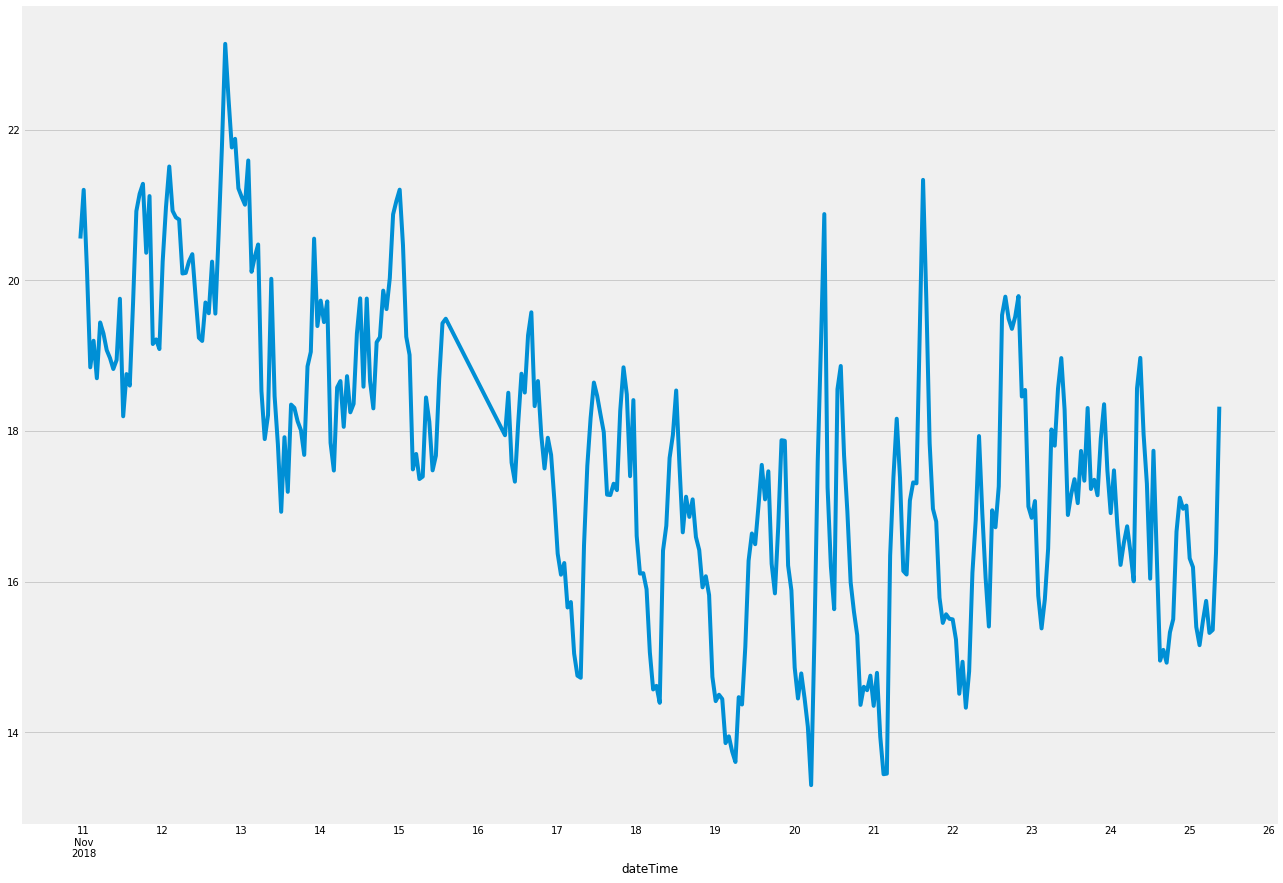

In [6]:
y.plot(figsize=(20, 15))
plt.show()

In [20]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 2, 24)
SARIMAX: (0, 0, 2) x (0, 1, 0, 24)
SARIMAX: (0, 0, 2) x (0, 1, 1, 24)


In [21]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
_param = []
_seasonal_param = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            pred = results.get_prediction(dynamic=False)
            
            AIC.append(results.aic)
            _param.append(param)
            _seasonal_param.append(param_seasonal)

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:2975.730153359781
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:2416.80372628412
ARIMA(0, 0, 0)x(0, 0, 2, 24)24 - AIC:1992.4380816294777
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:1217.5838282347158
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:1104.4315084145946
ARIMA(0, 0, 0)x(0, 1, 2, 24)24 - AIC:1004.8339526064559
ARIMA(0, 0, 0)x(0, 2, 0, 24)24 - AIC:1408.8056024523703
ARIMA(0, 0, 0)x(0, 2, 1, 24)24 - AIC:1068.3424915036921
ARIMA(0, 0, 0)x(0, 2, 2, 24)24 - AIC:952.889543855171
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:1209.333314291127
ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:1168.9803330031134
ARIMA(0, 0, 0)x(1, 0, 2, 24)24 - AIC:1083.15807107496
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:1110.7176548213326
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:1107.4800604631246
ARIMA(0, 0, 0)x(1, 1, 2, 24)24 - AIC:1005.9165147198945
ARIMA(0, 0, 0)x(1, 2, 0, 24)24 - AIC:1153.3293265598409
ARIMA(0, 0, 0)x(1, 2, 1, 24)24 - AIC:1079.8291925661613
ARIMA(0, 0, 0)x(1, 2, 2, 24)24 - AIC:964.7707872178571
A

ARIMA(0, 1, 2)x(1, 1, 2, 24)24 - AIC:708.2456254375861
ARIMA(0, 1, 2)x(1, 2, 0, 24)24 - AIC:970.2682957508737
ARIMA(0, 1, 2)x(1, 2, 1, 24)24 - AIC:846.2438753367612
ARIMA(0, 1, 2)x(1, 2, 2, 24)24 - AIC:746.8989216514065
ARIMA(0, 1, 2)x(2, 0, 0, 24)24 - AIC:751.5579924911768
ARIMA(0, 1, 2)x(2, 0, 1, 24)24 - AIC:752.7065900334663
ARIMA(0, 1, 2)x(2, 0, 2, 24)24 - AIC:748.6236285530599
ARIMA(0, 1, 2)x(2, 1, 0, 24)24 - AIC:755.6045033720236
ARIMA(0, 1, 2)x(2, 1, 1, 24)24 - AIC:737.2884661215951
ARIMA(0, 1, 2)x(2, 1, 2, 24)24 - AIC:710.2457474476784
ARIMA(0, 1, 2)x(2, 2, 0, 24)24 - AIC:825.5369036121116
ARIMA(0, 1, 2)x(2, 2, 1, 24)24 - AIC:770.3594739774636
ARIMA(0, 1, 2)x(2, 2, 2, 24)24 - AIC:757.0149152468964
ARIMA(0, 2, 0)x(0, 0, 0, 24)24 - AIC:1066.4679837697588
ARIMA(0, 2, 0)x(0, 0, 1, 24)24 - AIC:989.2824511150766
ARIMA(0, 2, 0)x(0, 0, 2, 24)24 - AIC:925.5410322041002
ARIMA(0, 2, 0)x(0, 1, 0, 24)24 - AIC:1205.2752295448809
ARIMA(0, 2, 0)x(0, 1, 1, 24)24 - AIC:963.4905066383278
ARIMA(0,

ARIMA(1, 0, 2)x(0, 0, 2, 24)24 - AIC:753.457115034458
ARIMA(1, 0, 2)x(0, 1, 0, 24)24 - AIC:932.6927672848224
ARIMA(1, 0, 2)x(0, 1, 1, 24)24 - AIC:759.957536585563
ARIMA(1, 0, 2)x(0, 1, 2, 24)24 - AIC:700.5107335234602
ARIMA(1, 0, 2)x(0, 2, 0, 24)24 - AIC:1171.8916171129868
ARIMA(1, 0, 2)x(0, 2, 1, 24)24 - AIC:852.1604670670444
ARIMA(1, 0, 2)x(0, 2, 2, 24)24 - AIC:715.3228532799214
ARIMA(1, 0, 2)x(1, 0, 0, 24)24 - AIC:803.2405899660315
ARIMA(1, 0, 2)x(1, 0, 1, 24)24 - AIC:816.3904281532699
ARIMA(1, 0, 2)x(1, 0, 2, 24)24 - AIC:755.5142079450583
ARIMA(1, 0, 2)x(1, 1, 0, 24)24 - AIC:814.5594636158919
ARIMA(1, 0, 2)x(1, 1, 1, 24)24 - AIC:761.6703574520079
ARIMA(1, 0, 2)x(1, 1, 2, 24)24 - AIC:697.7259543770699
ARIMA(1, 0, 2)x(1, 2, 0, 24)24 - AIC:945.1501598909028
ARIMA(1, 0, 2)x(1, 2, 1, 24)24 - AIC:823.2249231737085
ARIMA(1, 0, 2)x(1, 2, 2, 24)24 - AIC:727.8434190395709
ARIMA(1, 0, 2)x(2, 0, 0, 24)24 - AIC:753.0131635461311
ARIMA(1, 0, 2)x(2, 0, 1, 24)24 - AIC:754.1360167775533
ARIMA(1, 0,

ARIMA(1, 2, 1)x(1, 2, 2, 24)24 - AIC:756.6516766246064
ARIMA(1, 2, 1)x(2, 0, 0, 24)24 - AIC:755.9080212647549
ARIMA(1, 2, 1)x(2, 0, 1, 24)24 - AIC:757.1385101359604
ARIMA(1, 2, 1)x(2, 0, 2, 24)24 - AIC:756.5349737138317
ARIMA(1, 2, 1)x(2, 1, 0, 24)24 - AIC:761.6049855262058
ARIMA(1, 2, 1)x(2, 1, 1, 24)24 - AIC:742.2144763695346
ARIMA(1, 2, 1)x(2, 1, 2, 24)24 - AIC:716.1345716941028
ARIMA(1, 2, 1)x(2, 2, 0, 24)24 - AIC:835.4177003100147
ARIMA(1, 2, 1)x(2, 2, 1, 24)24 - AIC:777.8952993744508
ARIMA(1, 2, 1)x(2, 2, 2, 24)24 - AIC:771.5929641956325
ARIMA(1, 2, 2)x(0, 0, 0, 24)24 - AIC:863.3700666179525
ARIMA(1, 2, 2)x(0, 0, 1, 24)24 - AIC:799.640329282016
ARIMA(1, 2, 2)x(0, 0, 2, 24)24 - AIC:752.0822048313771
ARIMA(1, 2, 2)x(0, 1, 0, 24)24 - AIC:973.8652195956547
ARIMA(1, 2, 2)x(0, 1, 1, 24)24 - AIC:775.7450871065333
ARIMA(1, 2, 2)x(0, 1, 2, 24)24 - AIC:704.7113482628902
ARIMA(1, 2, 2)x(0, 2, 0, 24)24 - AIC:1217.364995856802
ARIMA(1, 2, 2)x(0, 2, 1, 24)24 - AIC:895.1691171420582
ARIMA(1, 2,

ARIMA(2, 1, 1)x(0, 1, 2, 24)24 - AIC:696.7718911173388
ARIMA(2, 1, 1)x(0, 2, 0, 24)24 - AIC:1181.734830779979
ARIMA(2, 1, 1)x(0, 2, 1, 24)24 - AIC:861.2060361822317
ARIMA(2, 1, 1)x(0, 2, 2, 24)24 - AIC:713.7846249166723
ARIMA(2, 1, 1)x(1, 0, 0, 24)24 - AIC:773.1827583398208
ARIMA(2, 1, 1)x(1, 0, 1, 24)24 - AIC:774.182180245189
ARIMA(2, 1, 1)x(1, 0, 2, 24)24 - AIC:722.4924672204735
ARIMA(2, 1, 1)x(1, 1, 0, 24)24 - AIC:810.8789056235591
ARIMA(2, 1, 1)x(1, 1, 1, 24)24 - AIC:753.9496851292258
ARIMA(2, 1, 1)x(1, 1, 2, 24)24 - AIC:687.0036462442184
ARIMA(2, 1, 1)x(1, 2, 0, 24)24 - AIC:944.0765676426604
ARIMA(2, 1, 1)x(1, 2, 1, 24)24 - AIC:829.0684053629277
ARIMA(2, 1, 1)x(1, 2, 2, 24)24 - AIC:728.4723818967746
ARIMA(2, 1, 1)x(2, 0, 0, 24)24 - AIC:723.2723689937851
ARIMA(2, 1, 1)x(2, 0, 1, 24)24 - AIC:722.7904105669957
ARIMA(2, 1, 1)x(2, 0, 2, 24)24 - AIC:723.8251693180234
ARIMA(2, 1, 1)x(2, 1, 0, 24)24 - AIC:726.2920016014732
ARIMA(2, 1, 1)x(2, 1, 1, 24)24 - AIC:712.9179269062483
ARIMA(2, 1,

In [22]:
min(AIC)
pos = AIC.index(min(AIC))
print(_param[pos], _seasonal_param[pos], min(AIC))

order = _param[pos]
seasonal_order = _seasonal_param[pos]

(2, 0, 2) (1, 1, 2, 24) 686.0506674875992


In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        temperature   No. Observations:                  347
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 24)   Log Likelihood                -335.025
Date:                            Sun, 25 Nov 2018   AIC                            686.051
Time:                                    13:45:08   BIC                            714.897
Sample:                                11-10-2018   HQIC                           697.632
                                     - 11-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7230      0.056     30.675      0.000       1.613       1.833
ar.L2         -0.7263      0.055   

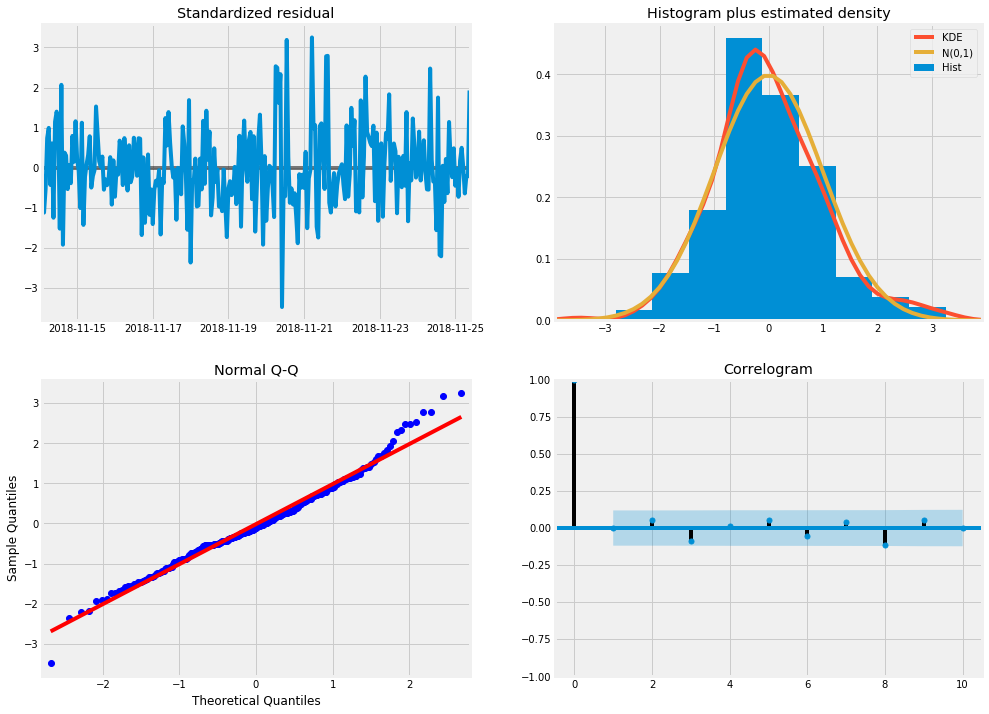

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-13 03:00:00'), dynamic=False)
pred_ci = pred.conf_int()

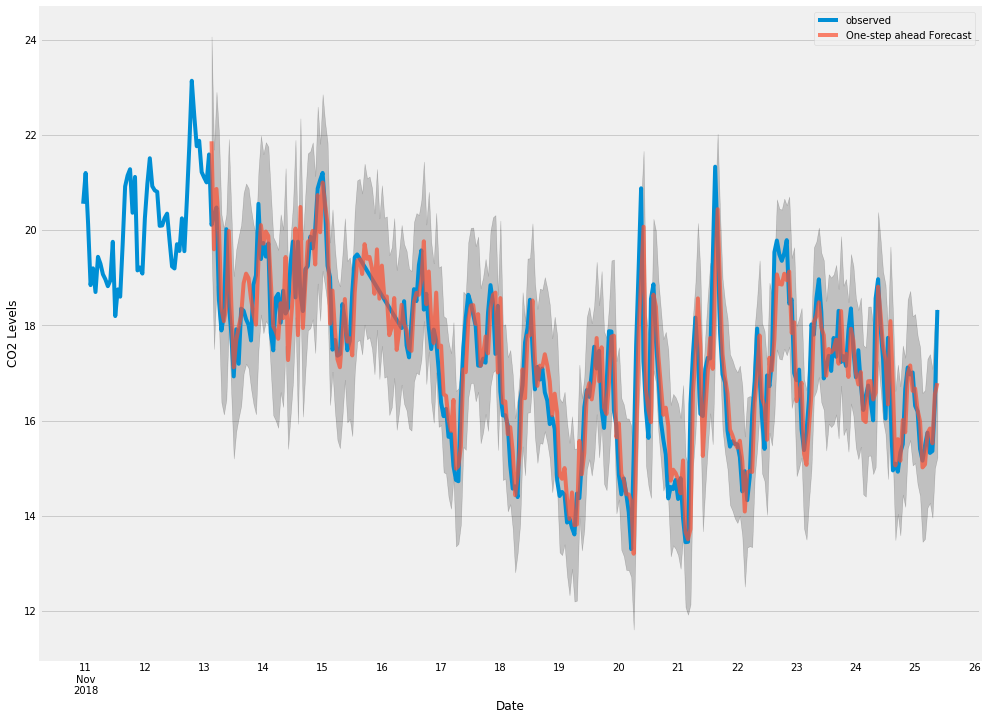

In [46]:
ax = y.plot(label='observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [53]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-11-11 03:00:00':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.69


In [54]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-11-24 03:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

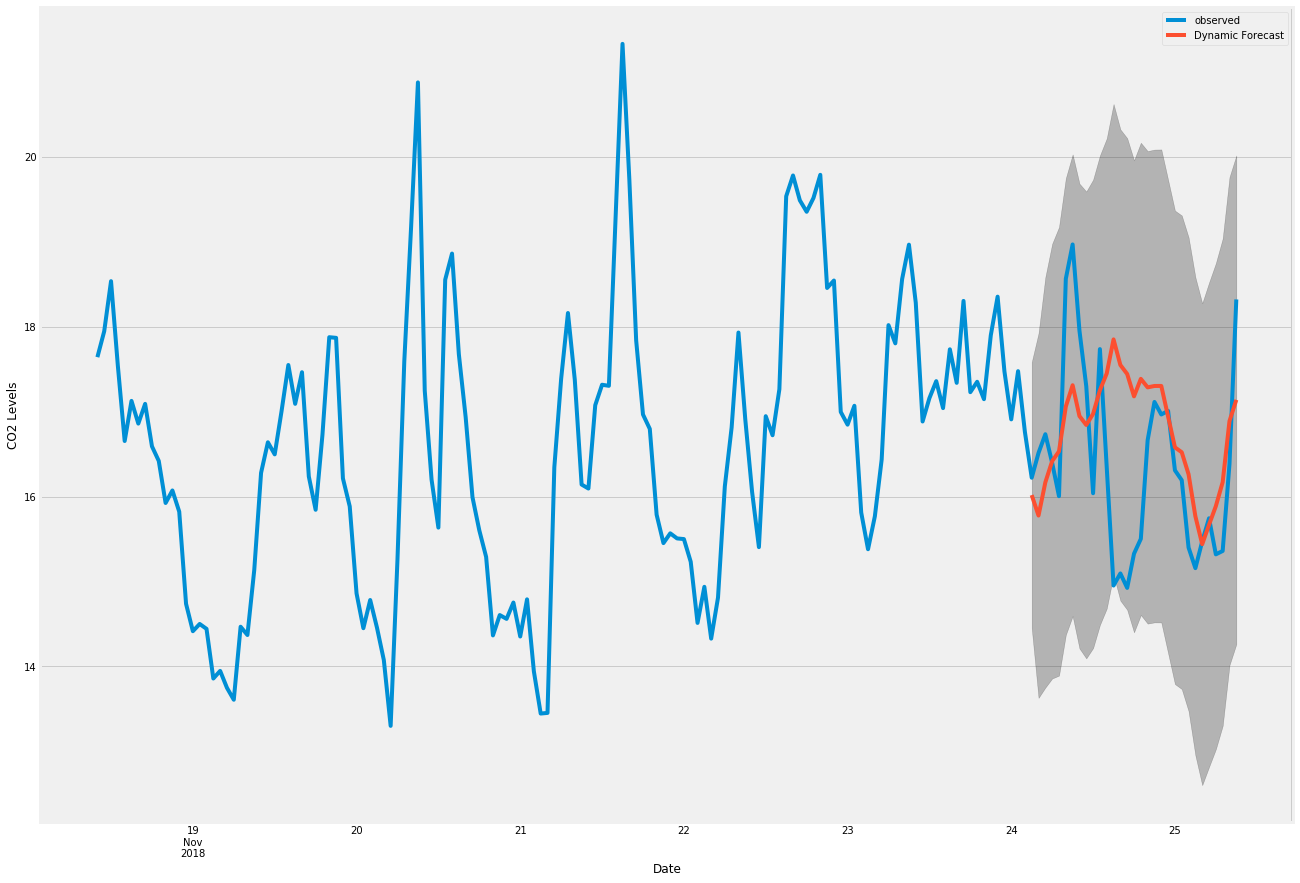

In [55]:
ax = y.last('W').plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

#ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-12-11 03:00:00'), y.index[-1],
                 #alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [56]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-11-19':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.35


In [51]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

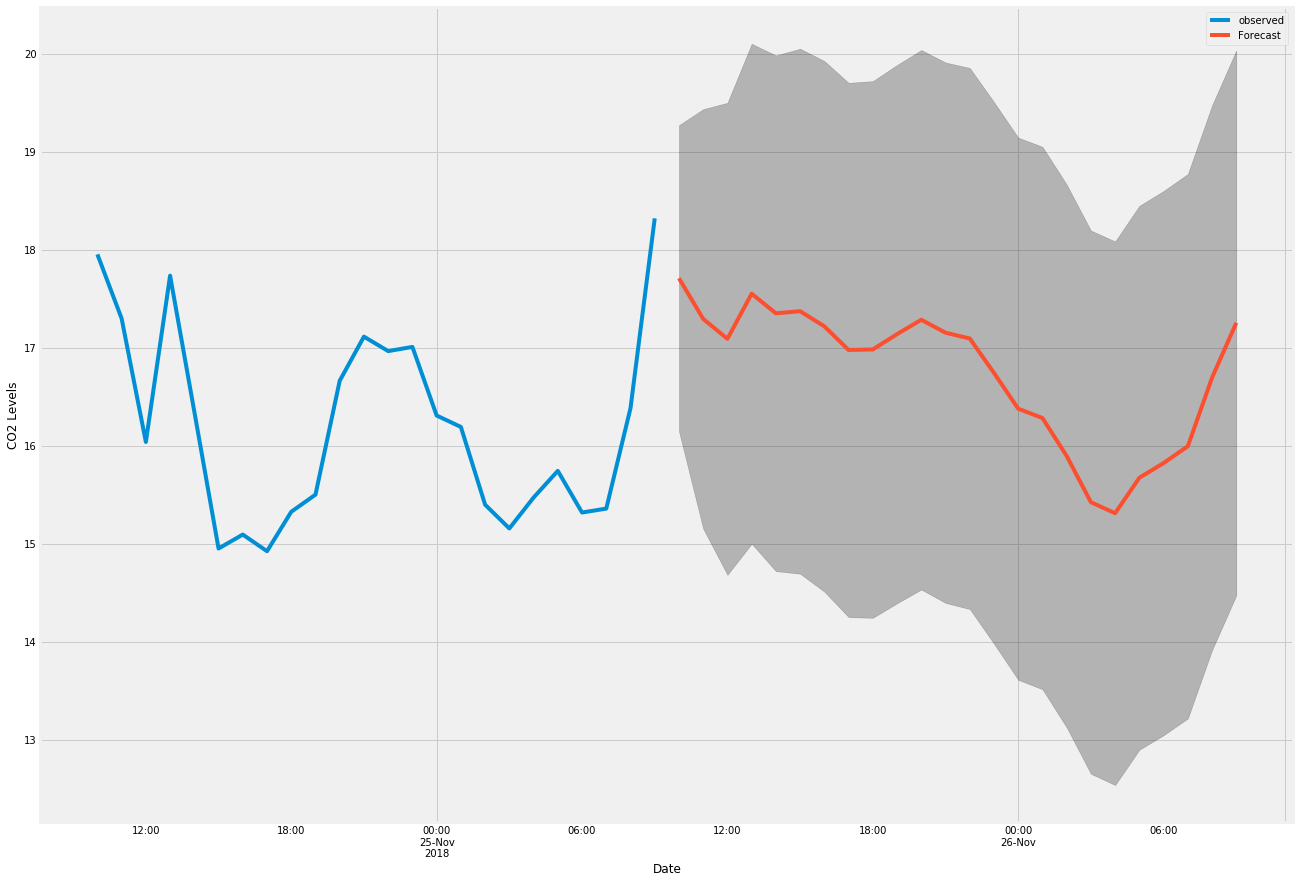

In [52]:
ax = y.last('D').plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()